2. Exercício de comparação entre as regressões Ridge e LASSO. Dada a seguinte versão ruidosa da função objetivo y_noisy = 2 + x + 0.5*x^2 + n, onde x é um vetor coluna com
M = 100 elementos retirados de uma distribuição aleatória uniformemente distribuída variando entre -3 e 3 e n é o vetor ruído com M elementos retirados de uma distribuição
aleatória Gaussiana com média 0 e variância unitária. Utilize um polinômio de ordem 90, padronização de atributos (ou seja, remoção da média e divisão pelo desvio padrão) e
regressão LASSO (utilize a biblioteca SciKit-Learn) com λ variando entre 1e-10 e 1 (utilize np.linspace (10**-10, 1, 1000)). Utilizando a função “ train_test_split ”, divida os
exemplos em um conjunto de treinamento e outro de validação com proporção 70% e 30%, respectivamente. Faça o seguinte
a. Plote um gráfico mostrando a função objetivo e sua versão ruidosa.
b. Crie um loop para testar cada um dos 1000 valores de λ. Para cada novo valor de λ, treine o modelo, execute a predição e calcule os erros de treinamento e
validação.
c. Para cada iteração do loop, armazene os valores do erro de treinamento e validação em um vetor.
d. Para cada iteração do loop, verifique se o valor do erro de validação atual é menor do que o erro de validação mínimo. Se sim, armazene o valor de λ e o
modelo utilizado para aquela iteração. (D ica : inicialize a variável contendo o erro de validação mínimo como: minimum_val_error = float("inf") ).
e. Plote um gráfico mostrando os erros de treinamento e validação versus os valores de λ.
f. Baseado no menor valor do erro de validação, qual é o valor ótimo para λ?
g. Dado que você armazenou o modelo que obteve o menor erro de validação, utilize-o para criar um gráfico que mostre a função hipótese (ou seja, o
mapeamento do atributos de entrada, x, nos valores de saída, y, através do modelo treinado) e a função objetivo e sua versão ruidosa.
h. Imprima os valores do pesos obtidos durante o treinamento do modelo que obteve o menor erro de validação ( Dica : use o atributo named_steps da classe
Pipeline para acessar os objetos que compõem o pipeline:
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html .
i. Repita os passos anteriores para a regressão de Ridge.
j. O que você percebe com relação aos pesos obtidos com as regressões Ridge e LASSO?
( Dica : Não se esqueça que os parâmetros do escalonamento de atributos, ou seja, média e devio padrão, são encontrados utilizando-se o conjunto de treinamento. Os
parâmetros encontrados são utilizados para escalonar o conjunto de validação).
( Dica : Na instanciação da classe Lasso, configure a tolerância para 1, i.e., tol=1.)
( Dica : A documentação do regressor LASSO pode ser acessada através deste link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highli
ght=lasso#sklearn.linear_model.Lasso )
( Dica : utilize a classe clone para criar uma cópia do modelo que atingiu erro de validação menor do que o valor mínimo atual.
https://scikit-learn.org/stable/modules/generated/sklearn.base.clone.html )

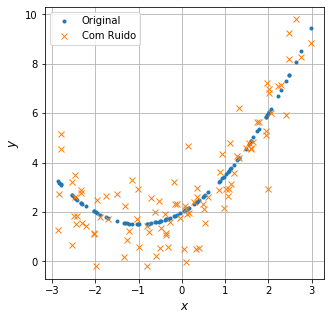

In [20]:
# Library
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.base import clone
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(25)

def target_function(M, x):
    y = 2 + x + 0.5*x**2
    return y

# Create target training function and its noisy version.
M = 100 # define the number of examples.
# vetor coluna com M=100 elementos retirados de uma distribuição aleatória uniformemente distribuída variando entre -3 e 3
x = 6*np.random.rand(M, 1) - 3
y = target_function(M, x)
y_noisy = y + np.random.randn(M, 1)

# Create target test function and its noisy version.
Mtest = 100
x_test = np.linspace(-3, 3, Mtest).reshape(Mtest, 1)
y_test = target_function(Mtest, x_test) + np.random.randn(Mtest, 1)

# 70 % treinamento e 30% validação
x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=0.7, random_state=22)

# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, '.', label='Original')
plt.plot(x, y_noisy, 'x', label='Com Ruido')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

In [21]:
# Regularization factor.
# lambda variando entre 1e^-10 e 1
lambdas = np.linspace(10**-11, 1, 1000)

include_bias = True

# Polinômio de ordem 90
model_order = 90

train_errors, val_errors, test_errors = [], [], []
# iniciando a variável contendo o erro de validação mínimo
minimum_val_error = float("inf")
best_epoch = None
best_model = None
best_lambda = None

for i in range(0,len(lambdas)):
    # Instantiate a polynomial with the given degree.
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a Ridge regressor.
    reg = Lasso(alpha=lambdas[i], tol=1, random_state=42) if lambdas[i] > 0 else LinearRegression()
    # Create a pipeline of actions.
    model = Pipeline([
        ("poly_features", poly_features),
        ("scaler", scaler),
        ("reg", reg),
    ])
    # Train model.
    model.fit(x_train, y_train)
    # Predict.
    y_train_predict = model.predict(x_train)
    y_val_predict = model.predict(x_val)
    y_test_predict = model.predict(x_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))
    
    if val_errors[i] < minimum_val_error:
        minimum_val_error = val_errors[i]
        best_epoch = i
        best_model = clone(model)
        best_lambda = lambdas[i]
        
print('b. Melhor época:',best_epoch)
print('c. Melhor Lambda:',best_lambda)
print('d. Erro de validação mínima:',minimum_val_error)

b. Melhor época: 132
c. Melhor Lambda: 0.13213213214081082
d. Erro de validação mínima: 1.2398220868730772


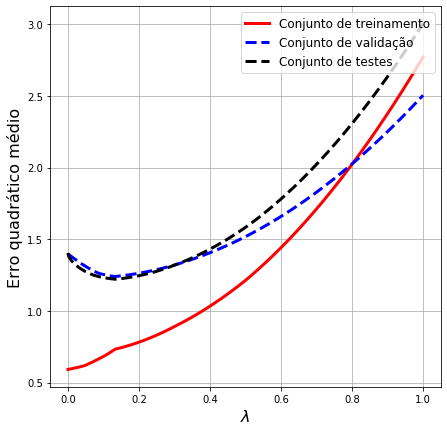

In [22]:
fig = plt.figure(figsize=(7,7))

plt.plot(lambdas, train_errors, "r-", linewidth=3, label="Conjunto de treinamento")
plt.plot(lambdas, val_errors, "b--", linewidth=3, label="Conjunto de validação")
plt.plot(lambdas, test_errors, "k--", linewidth=3, label="Conjunto de testes")
plt.legend(loc="upper right", fontsize=12)
plt.xlabel('$\lambda$', fontsize=16)
# Erro de treinamento e validação
plt.ylabel("Erro quadrático médio", fontsize=16)
plt.grid()
plt.show()

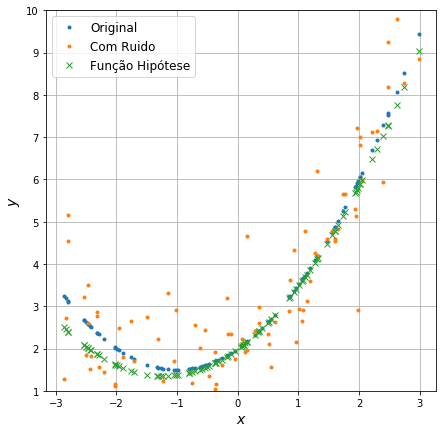

In [23]:
# Train model.
best_model.fit(x_train, y_train)

fig = plt.figure(figsize=(7,7))
plt.plot(x, y, '.', label='Original')
plt.plot(x, y_noisy, '.', label='Com Ruido')
plt.plot(x, best_model.predict(x), 'x', label='Função Hipótese')
plt.ylim([1, 10])
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [24]:
# Pesos obtidos durante o treinamento do modelo que obteve o menor erro de validação

print('Lambda: %1.4e:' % (best_lambda))
print(best_model.named_steps['reg'].intercept_)
print(best_model.named_steps['reg'].coef_)

Lambda: 1.3213e-01:
[3.42097727]
[ 0.00000000e+00  1.88843069e+00  1.16215048e+00  2.31158230e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -1.25377795e-03  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000

In [25]:
train_errors, val_errors, test_errors = [], [], []
minimum_val_error = float("inf")
best_epoch = None
best_model = None
best_lambda = None

for i in range(0,len(lambdas)):
    # Instantiate a polynomial with the given degree.
    poly_features = PolynomialFeatures(degree=model_order)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a Ridge regressor.
    reg = Ridge(alpha=lambdas[i], tol=1)
    # Create a pipeline of actions.
    model = Pipeline([
        ("poly_features", poly_features),
        ("scaler", scaler),
        ("reg", reg),
    ])
    # Train model.
    model.fit(x_train, y_train)
    # Predict.
    y_train_predict = model.predict(x_train)
    y_val_predict = model.predict(x_val)
    y_test_predict = model.predict(x_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))
    
    if val_errors[i] < minimum_val_error:
        minimum_val_error = val_errors[i]
        best_epoch = i
        best_model = clone(model)
        best_lambda = lambdas[i]
        
print('best_epoch:',best_epoch)
print('best_lambda:',best_lambda)
print('minimum_val_error:',minimum_val_error)

best_epoch: 999
best_lambda: 1.0
minimum_val_error: 1.3940513041026827


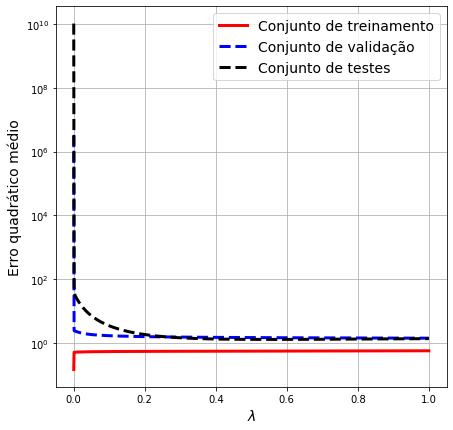

In [26]:
fig = plt.figure(figsize=(7,7))

plt.plot(lambdas, train_errors, "r-", linewidth=3, label="Conjunto de treinamento")
plt.plot(lambdas, val_errors, "b--", linewidth=3, label="Conjunto de validação")
plt.plot(lambdas, test_errors, "k--", linewidth=3, label="Conjunto de testes")
plt.legend(loc="upper right", fontsize=14)
plt.yscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel("Erro quadrático médio", fontsize=14)
plt.grid()
plt.show()

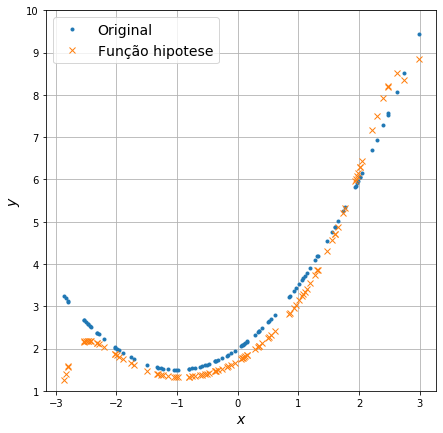

In [28]:
# Train model.
best_model.fit(x_train, y_train)

fig = plt.figure(figsize=(7,7))
plt.plot(x, y, '.', label='Original')
plt.plot(x, best_model.predict(x), 'x', label='Função hipotese')
plt.ylim([1, 10])
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [29]:
# Print coefs
print('Lambda: %1.4e:' % (best_lambda))
print(best_model.named_steps['reg'].intercept_)
print(best_model.named_steps['reg'].coef_)

Lambda: 1.0000e+00:
[3.42097727]
[[ 0.00000000e+00  1.49478009e+00  1.29840651e+00  6.10729167e-01
   5.52255273e-01  1.52348266e-01  6.16743228e-02 -5.49001884e-03
  -1.51384286e-01 -4.83618009e-02 -2.16975518e-01 -5.19164492e-02
  -2.16497836e-01 -4.56070547e-02 -1.90131567e-01 -3.92396567e-02
  -1.56343330e-01 -3.49669152e-02 -1.23147053e-01 -3.24445531e-02
  -9.36608193e-02 -3.08355734e-02 -6.87594979e-02 -2.94616423e-02
  -4.83335625e-02 -2.79267298e-02 -3.18847068e-02 -2.60674030e-02
  -1.88040351e-02 -2.38692381e-02 -8.49701828e-03 -2.13960845e-02
  -4.34203282e-04 -1.87420026e-02  5.83370645e-03 -1.60030093e-02
   1.06772490e-02 -1.32628572e-02  1.43965248e-02 -1.05876074e-02
   1.72317128e-02 -8.02515747e-03  1.93735273e-02 -5.60721385e-03
   2.09726320e-02 -3.35220484e-03  2.21476750e-02 -1.26830502e-03
   2.29919310e-02  6.43833306e-04  2.35786760e-02  2.38879943e-03
   2.39654775e-02  3.97461787e-03  2.41975848e-02  5.41137484e-03
   2.43105921e-02  6.71021005e-03  2.433252